In [25]:
from kmeans import KMeans
import numpy as np 
import matplotlib.pyplot as plt
from kmeans import *


intial centroids:  [array([1.26706638, 2.46676666]), array([-1.57079633,  2.46807032]), array([0.65720459, 0.62685521])]


/home/alexandre/.local/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


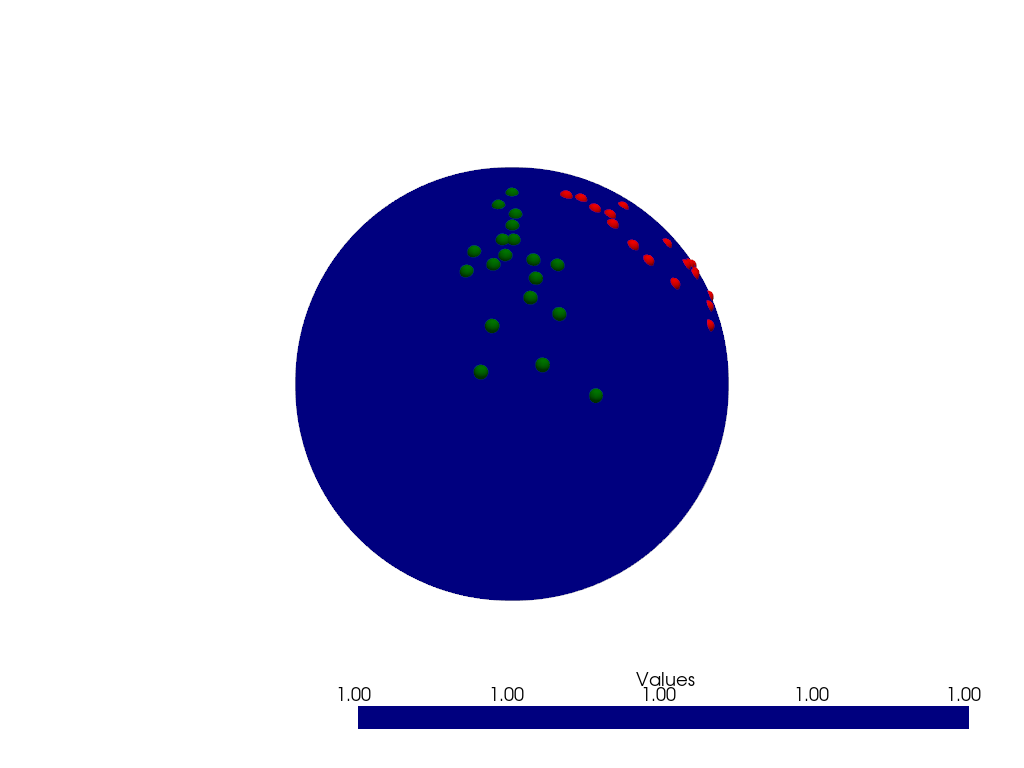

In [26]:

import display



Hs = 1
N = 18
n_clusters = 3
Is = 10
Imin = 0.1
planet_radius = 12


def f(x, y):
    return x/x



num_points_per_blob = 20

# Génération des points pour le premier blob
mean_phi1, mean_theta1 = np.pi/3, np.pi/4  # Angles moyens du premier blob
std_dev1 = np.pi/12  # Écart-type pour le premier blob
phi_blob1 = np.random.normal(mean_phi1, std_dev1, num_points_per_blob)
theta_blob1 = np.random.normal(mean_theta1, std_dev1, num_points_per_blob)

# Génération des points pour le deuxième blob
mean_phi2, mean_theta2 = np.pi/4, 3*np.pi/4  # Angles moyens du deuxième blob
std_dev2 = np.pi/12  # Écart-type pour le deuxième blob
phi_blob2 = np.random.normal(mean_phi2, std_dev2, num_points_per_blob)
theta_blob2 = np.random.normal(mean_theta2, std_dev2, num_points_per_blob)

# Génération des points pour le troisième blob
mean_phi3, mean_theta3 = -np.pi/3, 3*np.pi/4  # Angles moyens du troisième blob
std_dev3 = np.pi/12  # Écart-type pour le troisième blob
phi_blob3 = np.random.normal(mean_phi3, std_dev3, num_points_per_blob)
theta_blob3 = np.random.normal(mean_theta3, std_dev3, num_points_per_blob)

# Fusionner les ensembles de points pour former un seul ensemble de points
phi = np.concatenate((phi_blob1, phi_blob2, phi_blob3))
theta = np.concatenate((theta_blob1, theta_blob2, theta_blob3))

# Assurer que les angles phi restent dans la plage [-pi/2, pi/2]
phi = np.clip(phi, -np.pi/2, np.pi/2)

# Fusionner les deux ensembles de points
P = np.vstack((phi, theta)).T

population = np.random.randint(10, 101, size=len(P))
phip = P[:, 0]
thetap = P[:, 1]

kmeans = KMeans(n_clusters=3, max_iters=1000, distance="SPHERICAL")

kmeans.fit(P)
y_kmeans = kmeans.predict(P)


mySphere = display.Sphere("Adam", planet_radius, [0, 0, 0], f)

for i in range(len(P)) : 
    mySphere.add_cities(P[i][0], P[i][1], mySphere.dico_couleur[y_kmeans[i]])


mySphere.show()


In [27]:

def sigmoid(x, center = 0, M = 100) : 
    return 1/(1+np.exp(-M*(x-center)))


def distance_sq(r1, r2, phi1, phi2, theta1, theta2) : 
    x1 = r1*np.cos(phi1)*np.cos(theta1)
    y1 = r1*np.cos(phi1)*np.sin(theta1)
    z1 = r1*np.sin(phi1)
    x2 = r2*np.cos(phi2)*np.cos(theta2)
    y2 = r2*np.cos(phi2)*np.sin(theta2)
    z2 = r2*np.sin(phi2)
    return (x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2


def objectif(x) : 
    return 0

def contrainte1(x) : 
    somme = 0
    for j in range(len(population)) : 
        sumj = 0
        for i in range(N) : 

            dij_sq = distance_sq(planet_radius, planet_radius+Hs, phip[j], x[2*i], thetap[j], x[2*i+1]) 
            sumj += Is/(dij_sq)
            
        somme += sigmoid(sumj/population[j], center = Imin, M = 1e2)*population[j]
    return somme/sum(population)

In [28]:
from scipy.optimize import minimize
from scipy.optimize import NonlinearConstraint, LinearConstraint
import time
import numpy as np

centers = kmeans.cluster_centers_.reshape(n_clusters*2)


x0 = np.tile(centers, int(N/n_clusters))
randomx0 = [np.random.uniform(-10.0, 10.0) for i in range(len(x0))]

myc1 = NonlinearConstraint(contrainte1, 0.8, 1)
contraintes = [myc1]

t0 = time.time()
resultat = minimize(objectif, x0, method='COBYLA', constraints = contraintes)
print("temps : ", time.time()-t0)
print(resultat)
print("Résultat de l'optimisation:", resultat.fun)
print("Valeurs optimales des variables:", resultat.x)
print("Valeur de la contrainte 1 : ", contrainte1(resultat.x))


temps :  9.002101421356201
 message: Maximum number of function evaluations has been exceeded.
 success: False
  status: 2
     fun: 0.0
       x: [ 1.260e+00  2.322e+00 ...  1.351e+00  6.802e-01]
    nfev: 1000
   maxcv: 0.0
Résultat de l'optimisation: 0.0
Valeurs optimales des variables: [ 1.26043407  2.32205949 -1.14116167  2.62210675  1.19397056  1.66329332
  1.15880823  2.38550747 -0.82699811  2.42466516  1.07028877  0.39861894
  0.91998219  2.24959333 -1.42084467  2.58353208  1.18570505  0.71967656
  0.76633538  2.33059367 -1.37514238  2.28202411  1.49243218  0.90305214
  0.84205717  2.13760505 -1.03389497  2.37424633  1.00287851  0.95981138
  0.51026369  2.40381166 -1.21201031  2.39771728  1.35064508  0.68015102]
Valeur de la contrainte 1 :  0.8000302558827835


In [29]:
for i in range(N) : 
    mySphere.add_satellites(resultat.x[2*i], resultat.x[2*i+1], "black", Hs)


/home/alexandre/.local/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


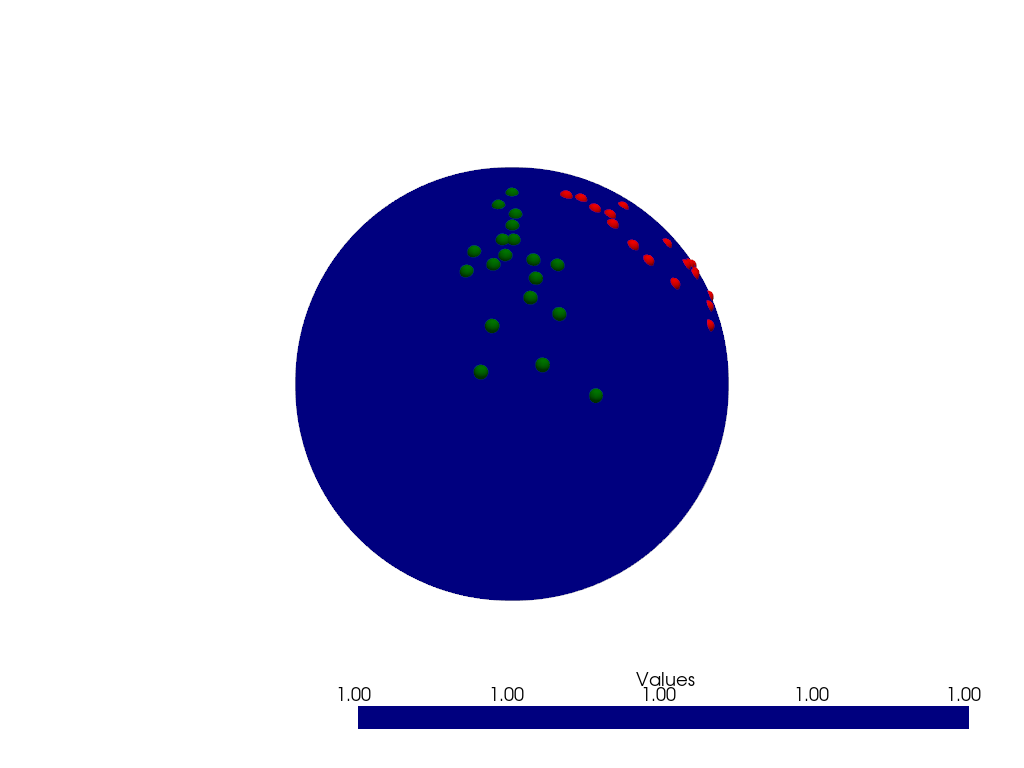

In [30]:
mySphere.show()